## Table of contents

### 01. Import Data and Libraries

### 02. Creating Bar Charts

### 03. Creating Histograms and Scatterplots

### 04. Creating Line Charts

### 01. Import Data and Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'C:\Users\iryna\Documents\Data analytics\Career foundry\4. Python\06-2022 Instacart Basket Analysis'

In [3]:
# Import Data
df_ords_prods = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_busiest.pkl'))

In [4]:
# Checking the output
df_ords_prods

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Average orders
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Least busy,Most orders
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Average orders
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,Soda,77,7,9.0,both,Mid-range product,Least busy,Least busy,Most orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,17,2,15,1.0,43553.0,2.0,1.0,Orange Energy Shots,64,7,3.7,both,Low-range product,Regularly busy,Regularly busy,Most orders
32404855,31526,202557,18,5,11,3.0,43553.0,2.0,1.0,Orange Energy Shots,64,7,3.7,both,Low-range product,Regularly busy,Regularly busy,Most orders
32404856,758936,203436,1,2,7,NaN,42338.0,4.0,0.0,"Zucchini Chips, Pesto",50,19,6.9,both,Mid-range product,Regularly busy,Regularly busy,Average orders
32404857,2745165,203436,2,3,5,15.0,42338.0,16.0,1.0,"Zucchini Chips, Pesto",50,19,6.9,both,Mid-range product,Regularly busy,Least busy,Fewest orders


### 02. Creating Bar Charts

<AxesSubplot:>

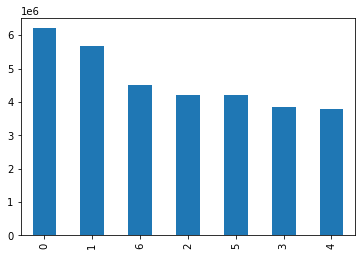

In [6]:
# Create a bar chart
df_ords_prods['order_day_of_week'].value_counts().plot.bar()

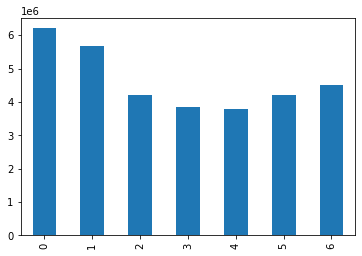

In [7]:
# Sorting according to the index order
bar = df_ords_prods['order_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
# Aggregating Data with agg()
df_ords_prods.groupby('order_day_of_week').agg({'order_number': ['count']})

,order_number
,count
order_day_of_week,
0,6204182
1,5660230
2,4213830
3,3840534
4,3783802
5,4205791
6,4496490


In [10]:
# Value counts
df_ords_prods['order_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

In [11]:
# Sorting by index
df_ords_prods['order_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

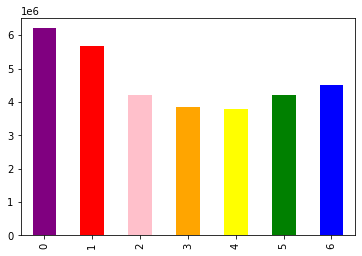

In [12]:
# adding colours
bar = df_ords_prods['order_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [14]:
# Exporting chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### 03. Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

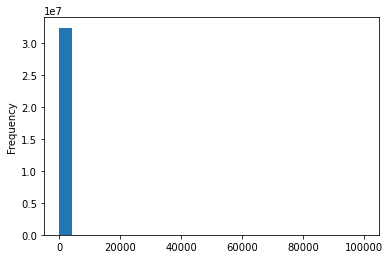

In [16]:
# Histogram
df_ords_prods['prices'].plot.hist(bins = 25)

In [17]:
df_ords_prods['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

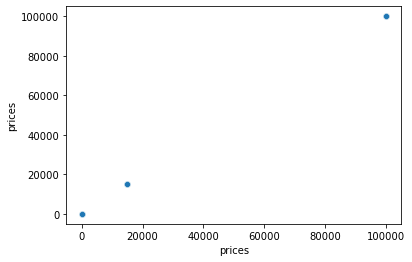

In [18]:
# Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods)

In [20]:
# checking prices > 100
df_ords_prods.loc[df_ords_prods['prices'] > 100]

,order_id,user_id,order_number,order_day_of_week,order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest day,busiest days,busiest_period_of_day
10030345,912404,17,12,2,14,5.0,21553.0,5.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders
10030346,603376,17,22,6,16,4.0,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Most orders
10030347,3264360,135,2,2,21,13.0,21553.0,6.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Regularly busy,Average orders
10030348,892534,135,3,0,8,12.0,21553.0,3.0,1.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Busiest day,Busiest day,Average orders
10030349,229704,342,8,1,19,30.0,21553.0,9.0,0.0,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,both,High-range product,Regularly busy,Busiest day,Average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664.0,1.0,0.0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest day,Average orders
29166210,2363282,204099,31,0,9,2.0,33664.0,1.0,1.0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Busiest day,Busiest day,Most orders
29166211,3181945,204395,13,3,15,8.0,33664.0,25.0,0.0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Least busy,Most orders
29166212,2486215,205227,7,3,20,4.0,33664.0,8.0,0.0,2 % Reduced Fat Milk,84,16,99999.0,both,High-range product,Regularly busy,Least busy,Average orders


In [21]:
# prices>100 marking as missing
df_ords_prods.loc[df_ords_prods['prices'] >100, 'prices'] = np.nan

In [22]:
# checking maximum price
df_ords_prods['prices'].max()

25.0

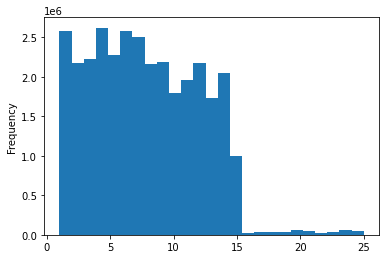

In [23]:
# histogram after cleaning the data
hist = df_ords_prods['prices'].plot.hist(bins = 25)

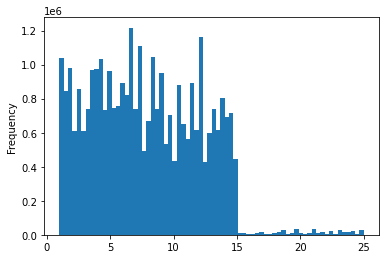

In [24]:
hist_2 = df_ords_prods['prices'].plot.hist(bins = 70)

In [26]:
# Exporting the histogram
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_dow.png'))

### 04. Creating Line Charts

In [28]:
# Sampling: Set the seed for the random number generator and create a list holding to the test np.random.rand()<=0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods)) <= 0.7

In [29]:
# Sampling: checking the output
dev

array([False,  True, False, ...,  True,  True,  True])

In [30]:
# Sampling:  a list of random numbers
np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

In [32]:
# Sampling: store 70% of the sample in the dataframe big and 30% in the dataframe small
big = df_ords_prods[dev]
small = df_ords_prods[~dev]

In [33]:
# Checking the length
len(df_ords_prods)

32404859

In [34]:
len(big)+len(small)

32404859

In [35]:
# Reducing the samples to only those columns necessary for the chart
df_2 = small[['order_day_of_week','prices']]

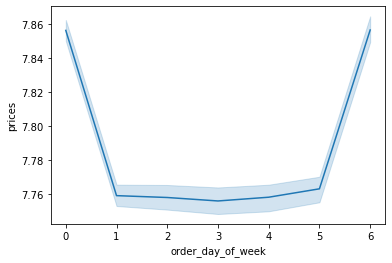

In [37]:
# Creating the line chart
line = sns.lineplot(data = df_2, x = 'order_day_of_week',y = 'prices')

In [40]:
# Exporting the line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_dow.png'))